# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 42.2 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 83.2 MB/s eta 0:00:01


**Important: Restart the Kernel at this moment**

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
!pip install --upgrade ipywidgets jupyter tqdm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 9.9 MB/s  eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 5.1.4 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.5
    Uninstalling ipywidgets-8.1.5:
      Successfully uninstalled ipywidgets-8.1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension install --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Installing /root/.local/lib/python3.7/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Making directory: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/
Copying: /root/.local/lib/python3.7/site-packages/widgetsnbextension/static/extension.js -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
Copying: /root/.local/lib/python3.7/site-packages/widgetsnbextension/static/extension.js.map -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
Copying: /root/.local/lib/python3.7/site-packages/widgetsnbextension/static/extension.js.LICENSE.txt -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.LICENSE.txt
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    


In [4]:
# Define transforms
## YOUR CODE HERE ##
#convert the mnist images from 28*28 grayscale to tensor
#transfroms module performs image transformation like normalization,
#resizing, colour change etc
#the Compose helps  more than one at once
transform= transforms.Compose([transforms.ToTensor(), #converts the image from (0,255) to [0,1] tensor
#normalization helps to prepare or process data by scaling pixel values
 #in an image to range [0-1] ;; leads to faster convergence                   
transforms.Normalize((0.1307,), (0.3081,))]) #others to 0
#the mean and std
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset= torchvision.datasets.MNIST(root= './data',    train= True, transform=transform, download=True)
train_loader= torch.utils.data.DataLoader(train_dataset, batch_size=5, shuffle=True)
# Create test set and define test dataloader
test_dataset= torchvision.datasets.MNIST(root= './data',train= False,transform=transform,download= True)
test_loader= torch.utils.data.DataLoader(test_dataset, batch_size=5,shuffle=True)

#flattening involves converting nested data, like JSON, or combining data from multiple relational 
#tables into a single, denormalized table to simplify querying and model input. 

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**WHY I CHOSE THE PREPRROCESSING STEPS**
1. I used ToTensor() to transform the 28 *28 black and white image to a tensor for preparation (machine learning)
2. I then normalized the image by scaling the pixel values(0-255) to 0-1 using the mean and standard deviation. This is to ensure faster convergence and to prevent large variations form affecting the learning process.
Normalization is also to standardize the input data, making the training process more stable

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


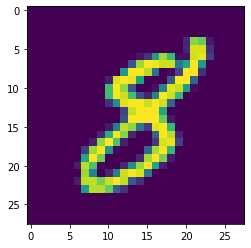

2


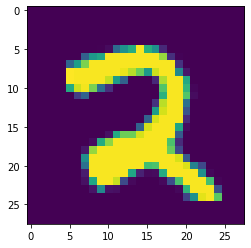

3


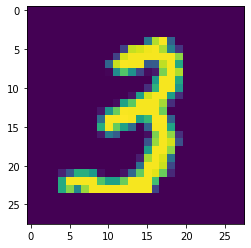

3


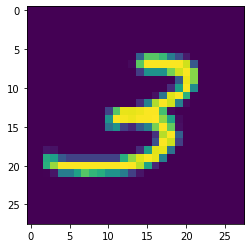

6


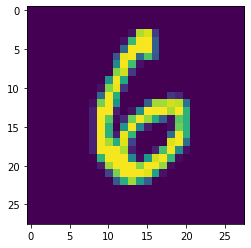

Image shape: torch.Size([1, 28, 28])
Label: 5
Test Image shape: torch.Size([1, 28, 28])
LAbel: 2
Number of training samples: 60000
Number of test samples: 10000


In [6]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)
image, label = train_dataset[0]
print("Image shape:", image.shape)    
print("Label:", label)

image, label = test_dataset[1]
print("Test Image shape:", image.shape)
print("LAbel:", label)


# Total dataset size
print("Number of training samples:", len(train_dataset))
print("Number of test samples:", len(test_dataset))


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
#The Role of Flatten:
#The Flatten layer reshapes a multi-dimensional input tensor into a one-dimensional tensor (a vector) while
#preserving the batch dimension. For example, an input tensor of shape (batch_size, height, width, channels) 
#would be transformed into (batch_size, height * width * channels). This flattened vector can then be correctly 
#processed by subsequent Linear layers.
#Without Flattening:
#If a multi-dimensional tensor is fed directly into a Linear layer without prior flattening, 
#the network will likely encounter a shape mismatch error, as the Linear layer cannot interpret 
#the multi-dimensional structure.
#Neural networks expect a vector input (1D).
#So we flatten each image 

#Instead of creating nn.ReLU() etc. as layers, you can just call functions from F inside the forward() pass.

class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        
        # Convolutional layers (to extract features)
        #applies a 2D convolution operation to input data, typically images.
        #It uses a sliding window (the kernel or filter) to perform an element-wise multiplication
        #and sum-up operation on portions of the input, extracting spatial features like edges and textures
        #to recognize patterns in images.
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)            #32 out,  28/2=14
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)           #64 guys re out 14/2=7
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  
#64 7 *7 neurons
        # Fully connected layers (for classification)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)   # Hidden layer 1                                           
        #28/2- /2= /2(7)  TWO POOLING STEPS FOR INPUT
        #64 feature maps
        self.fc2 = nn.Linear(128, 64)           # Hidden layer 2 takes in 128 and gives out 64 neurons
        self.fc3 = nn.Linear(64, 10)            # Output layer (10 classes for MNIST [0-9 DIGITS])

        #forward pass passes the images through model to get predictions
    def forward(self, x):
        # Feature extraction
        #RELU a non linear activation function for neural networks (Rectified Linear Unit)
        #pool reduces feature mapping by downsampling
        x = self.pool(F.relu(self.conv1(x)))   # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))   # Conv2 -> ReLU -> Pool

        # Flatten the 2D feature maps into 1D
        x = x.view(-1, 64 * 7 * 7)  

        # Classification layers
        x = F.relu(self.fc1(x))  # Hidden layer 1 with ReLU
        x = F.relu(self.fc2(x))  # Hidden layer 2 with ReLU
        x = self.fc3(x)          # Output layer
        
        x = F.softmax(x, dim=1)
#dim=1 means apply softmax across classes for each sample in the batch.
#This ensures the outputs are probabilities between 0 and 1.
#They also sum to 1 across the 10 classes (digits 0–9).
        return x



Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [21]:
## WE ARE DOING MULTICLASS CLASSIFICATION (0-9)
##CPU tensors reside in system RAM, while CUDA tensors reside in GPU memory so if we do not write the
##model, images and labels to cuda , cpu will not run it because it is not matching i.e the data in cuda and model on cpu
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
model= MNIST_CNN()  #instantiating the model
model.to(device)
criterion= nn.CrossEntropyLoss() #although it is better to not include softmax when working with this because of matching
#CrossEntropy is still the best for multiclassification like this
 

# Optimizer updates the weights based on gradients
#weights are numerical parameters within a model, such as a neural network, 
#that determine the strength of the connection between inputs and the output
#weights signify the importance of an input in a model's final decision
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [25]:
#Forward pass: model predicts output.
#Loss calculation: compare prediction vs. label.
#Zero gradients: clear old gradients.
#Backward pass: compute new gradients.
#Step: update weights.

train_losses = []  
## YOUR CODE HERE ##
#num_epochs = 5

num_epochs = 10 #tuning hyperparameters

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):    #Each batch has:images:MNIST digit images (tensor form).
#labels: correct digit values (0–9).
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()  #ensures that old gradientts from previous batches are cleared to avoid accumulation
        loss.backward()  #calculate how much each parameter contributed tot he error
        optimizer.step()  #updates the weights using the previously defined Adam optimizer
        running_loss += loss.item()  
    

        # Print progress every 250 batches
        if (batch_idx + 1) % 250 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
    # Compute average epoch loss
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] Training Loss: {avg_loss:.4f}")        


Epoch [1/10], Step [250/1875], Loss: 1.4612
Epoch [1/10], Step [500/1875], Loss: 1.4612
Epoch [1/10], Step [750/1875], Loss: 1.4924
Epoch [1/10], Step [1000/1875], Loss: 1.4923
Epoch [1/10], Step [1250/1875], Loss: 1.4680
Epoch [1/10], Step [1500/1875], Loss: 1.5111
Epoch [1/10], Step [1750/1875], Loss: 1.4612
Epoch [1/10] Training Loss: 1.4727
Epoch [2/10], Step [250/1875], Loss: 1.4612
Epoch [2/10], Step [500/1875], Loss: 1.4612
Epoch [2/10], Step [750/1875], Loss: 1.4612
Epoch [2/10], Step [1000/1875], Loss: 1.4612
Epoch [2/10], Step [1250/1875], Loss: 1.4612
Epoch [2/10], Step [1500/1875], Loss: 1.4612
Epoch [2/10], Step [1750/1875], Loss: 1.4612
Epoch [2/10] Training Loss: 1.4716
Epoch [3/10], Step [250/1875], Loss: 1.4612
Epoch [3/10], Step [500/1875], Loss: 1.4612
Epoch [3/10], Step [750/1875], Loss: 1.4612
Epoch [3/10], Step [1000/1875], Loss: 1.4612
Epoch [3/10], Step [1250/1875], Loss: 1.4706
Epoch [3/10], Step [1500/1875], Loss: 1.4612
Epoch [3/10], Step [1750/1875], Loss: 1

Plot the training loss (and validation loss/accuracy, if recorded).

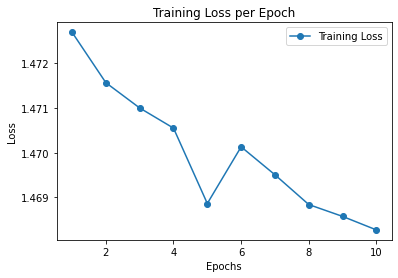

In [26]:
## YOUR CODE HERE ##
plt.plot(range(1, num_epochs+1), train_losses, marker='o', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [27]:
## YOUR CODE HERE ##
model.eval()  # evaluation mode (important for dropout/batchnorm)
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():  # no backpropagation here since we are not updating weights, just testing
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)   # compute test loss
        test_loss += loss.item()

        # Get predictions
        _,predicted = torch.max(outputs.data, 1)

        # Update counts initialized earlier
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute final metrics
avg_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

Test Loss: 1.4714, Test Accuracy: 98.98%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [17]:
## YOUR CODE HERE ##
batch_size = 32    #balances speed stabiility and generalization
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#learning rate and batch size are linked
#and have been tuneed accoringly in above cells
#good learning rate 0.0005 and 32 batch size helped model achieve 98%
#from o.oo1 and 5 tha gave 96% AND 0.001 and 32 that gave 95%
#then 10 epochs 0.0005 rate 32 batch size gave model 98.98% accuracyyy

## Saving your model
Using `torch.save`, save your model for future loading.

In [28]:
## YOUR CODE HERE ##
#torch.save(model)
torch.save(model.state_dict(), "cnn_mnist.pth")